In [31]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library
import requests

# Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

import time

# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
longs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats,longs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-35.465628700212875, -102.05379230027154),
 (-1.6306813123634782, 104.08039436687733),
 (88.19961675278589, -140.06521822469685),
 (77.32270587564412, -74.55305156168572),
 (86.99859954829881, 122.05423342422381),
 (37.79521647442425, -54.777300401971715),
 (-73.23047869188633, 4.008396431056866),
 (-61.87946044332368, -7.747992631277157),
 (-85.39656273121386, -126.67100126950893),
 (56.6569988187637, 5.572759807899956),
 (43.59462456922003, 25.885948024894333),
 (-46.035562576742755, 98.04710947751795),
 (-28.839960325649784, 148.27808186321255),
 (85.87440643098043, 114.45177583084654),
 (54.8749358667674, 109.3679987369062),
 (-83.00354684514453, 122.16876403646347),
 (-64.72063420492928, 79.81703931076618),
 (-16.28756089883794, 22.189419767274416),
 (86.26154096181261, -143.1091077748811),
 (-23.675828221688818, 9.375051755747563),
 (-87.33397485119504, 38.73624498261705),
 (67.61557057336606, -109.36818226462566),
 (51.09025031983941, -122.52046416576304),
 (-74.60761378076101

In [4]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

612

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | simpang
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | vestbygda
City not found. Skipping...
Processing Record 11 of Set 1 | dve mogili
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | moree
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | severobaykalsk
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | senanga
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | lillooet
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | sherman
Processing Record 24

Processing Record 37 of Set 4 | darnah
Processing Record 38 of Set 4 | marsh harbour
Processing Record 39 of Set 4 | bababe
City not found. Skipping...
Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | tianpeng
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | rancho palos verdes
Processing Record 46 of Set 4 | san quintin
Processing Record 47 of Set 4 | key west
Processing Record 48 of Set 4 | falealupo
City not found. Skipping...
Processing Record 49 of Set 4 | wuwei
Processing Record 50 of Set 4 | esperance
Processing Record 1 of Set 5 | meyungs
City not found. Skipping...
Processing Record 2 of Set 5 | mendeleyevsk
Processing Record 3 of Set 5 | nanortalik
Processing Record 4 of Set 5 | sherbakul
Processing Record 5 of Set 5 | vanavara
Processing Record 6 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 5 | magomeni
Processing 

Processing Record 21 of Set 8 | dunmore town
Processing Record 22 of Set 8 | san policarpo
Processing Record 23 of Set 8 | amderma
City not found. Skipping...
Processing Record 24 of Set 8 | predivinsk
Processing Record 25 of Set 8 | itaborai
Processing Record 26 of Set 8 | chokurdakh
Processing Record 27 of Set 8 | santander
Processing Record 28 of Set 8 | coolum beach
Processing Record 29 of Set 8 | baruun-urt
Processing Record 30 of Set 8 | port-gentil
Processing Record 31 of Set 8 | namatanai
Processing Record 32 of Set 8 | fort nelson
Processing Record 33 of Set 8 | sambava
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | ponnani
Processing Record 36 of Set 8 | zhoucun
Processing Record 37 of Set 8 | krasnyy
Processing Record 38 of Set 8 | airai
Processing Record 39 of Set 8 | maniitsoq
Processing Record 40 of Set 8 | saint anthony
Processing Record 41 of Set 8 | dedougou
Processing Record 42 of Set 8 | guaira
Processing Record 43 of Set 8 | mana
Processi

Processing Record 13 of Set 12 | yarmouth
Processing Record 14 of Set 12 | bell ville
Processing Record 15 of Set 12 | leova
Processing Record 16 of Set 12 | nabire
Processing Record 17 of Set 12 | sabha
Processing Record 18 of Set 12 | dekoa
City not found. Skipping...
Processing Record 19 of Set 12 | yerbogachen
Processing Record 20 of Set 12 | juneau
Processing Record 21 of Set 12 | maldonado
Processing Record 22 of Set 12 | santiago del estero
Processing Record 23 of Set 12 | chambar
Processing Record 24 of Set 12 | garissa
Processing Record 25 of Set 12 | orlik
Processing Record 26 of Set 12 | abonnema
Processing Record 27 of Set 12 | trairi
Processing Record 28 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 29 of Set 12 | okhotsk
Processing Record 30 of Set 12 | salinopolis
Processing Record 31 of Set 12 | chernyshevskiy
Processing Record 32 of Set 12 | ilhabela
Processing Record 33 of Set 12 | uppiliapuram
City not found. Skipping...
Processing Record 34 of 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.62,-73.65,61.63,49,94,7.58,CL,2020-04-14 17:51:56
1,Simpang,-1.27,104.08,79.77,84,78,6.15,ID,2020-04-14 17:51:56
2,Tuktoyaktuk,69.45,-133.04,17.60,92,40,10.29,CA,2020-04-14 17:51:56
3,Qaanaaq,77.48,-69.36,22.53,94,100,4.38,GL,2020-04-14 17:51:56
4,Tiksi,71.69,128.87,8.94,95,100,5.21,RU,2020-04-14 17:51:57
5,Saint-Pierre,-21.34,55.48,77.00,78,75,4.70,RE,2020-04-14 17:51:57
6,Hermanus,-34.42,19.23,64.99,81,1,1.99,ZA,2020-04-14 17:51:57
7,Cape Town,-33.93,18.42,64.99,77,0,8.05,ZA,2020-04-14 17:51:57
8,Rikitea,-23.12,-134.97,75.76,70,40,8.30,PF,2020-04-14 17:51:58
9,Dve Mogili,43.60,25.87,59.00,54,97,20.80,BG,2020-04-14 17:51:58


In [13]:
# Reorder the DF
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2020-04-14 17:51:56,-37.62,-73.65,61.63,49,94,7.58
1,Simpang,ID,2020-04-14 17:51:56,-1.27,104.08,79.77,84,78,6.15
2,Tuktoyaktuk,CA,2020-04-14 17:51:56,69.45,-133.04,17.60,92,40,10.29
3,Qaanaaq,GL,2020-04-14 17:51:56,77.48,-69.36,22.53,94,100,4.38
4,Tiksi,RU,2020-04-14 17:51:57,71.69,128.87,8.94,95,100,5.21
5,Saint-Pierre,RE,2020-04-14 17:51:57,-21.34,55.48,77.00,78,75,4.70
6,Hermanus,ZA,2020-04-14 17:51:57,-34.42,19.23,64.99,81,1,1.99
7,Cape Town,ZA,2020-04-14 17:51:57,-33.93,18.42,64.99,77,0,8.05
8,Rikitea,PF,2020-04-14 17:51:58,-23.12,-134.97,75.76,70,40,8.30
9,Dve Mogili,BG,2020-04-14 17:51:58,43.60,25.87,59.00,54,97,20.80


In [14]:
# Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

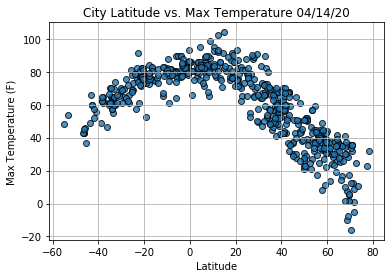

In [18]:
# add the time module "import time" (done in 1st cell)
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Weather_Data/Fig1.png")

# Show plot
plt.show()

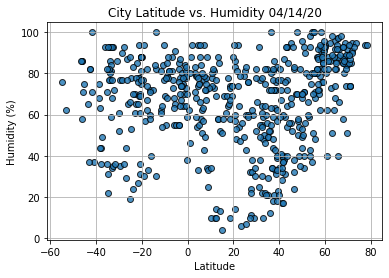

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Weather_Data/Fig2.png")
# Show plot
plt.show()

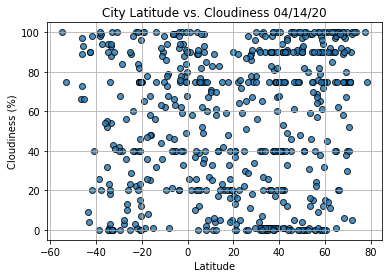

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Weather_Data/Fig3.png")
# Show plot
plt.show()

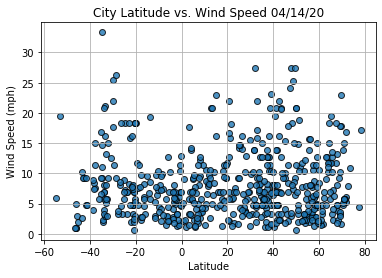

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Weather_Data/Fig4.png")
# Show plot
plt.show()

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data. 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

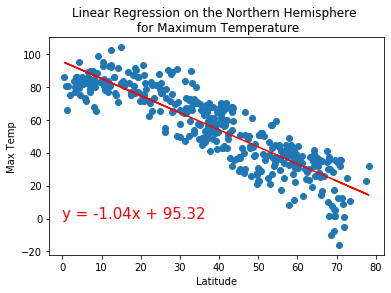

In [42]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

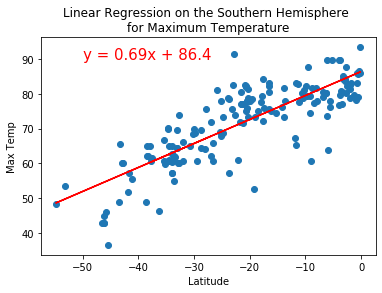

In [43]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

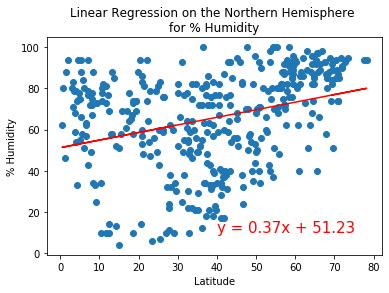

In [44]:
# Linear regression on the Northern Hemisphere - Humididty
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

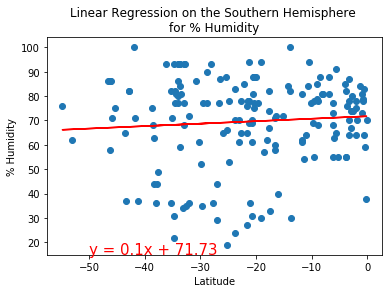

In [45]:
# Linear regression on the Southern Hemisphere - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

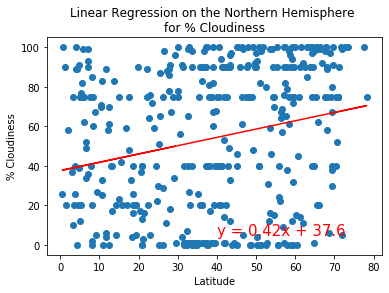

In [47]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,5))

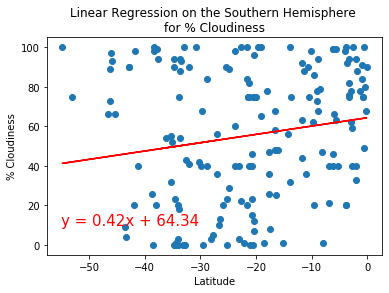

In [49]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,10))

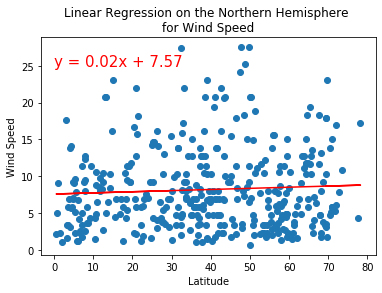

In [51]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(0,25))

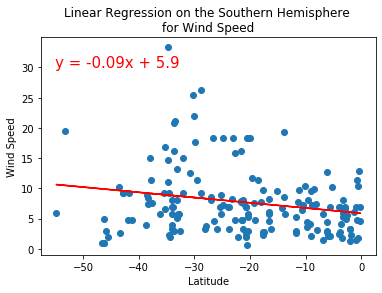

In [53]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-55,30))